In [ ]:
import json
import os

# Define the metrics from your tables
metrics = [
    "Win Rate", "Avg VP", "Avg Turns", "Avg Settles", "Avg Cities", 
    "Avg Roads", "Avg Army", "Avg Dev VP"
]

# Define the models and agents
models = ["GPT-4o", "Claude-3.7", "Mistral-Large"]
agents = ["BaseAgent", "StructuredAgent", "PromptEvolver", "SelfEvolver"]

# Create data structure based on your tables
results_data = {
    "BaseAgent": {
        "GPT-4o": {
            "Win Rate": 0.00,
            "Avg VP": 3.60,
            "Avg Turns": 72.20,
            "Avg Settles": 1.80,
            "Avg Cities": 0.50,
            "Avg Roads": 0.00,
            "Avg Army": 0.00,
            "Avg Dev VP": 0.80
        },
        "Claude-3.7": {
            "Win Rate": 0.00,
            "Avg VP": 3.70,
            "Avg Turns": 80.80,
            "Avg Settles": 2.10,
            "Avg Cities": 0.30,
            "Avg Roads": 0.00,
            "Avg Army": 0.20,
            "Avg Dev VP": 0.60
        },
        "Mistral-Large": {
            "Win Rate": 0.00,
            "Avg VP": 3.60,
            "Avg Turns": 67.80,
            "Avg Settles": 2.50,
            "Avg Cities": 0.10,
            "Avg Roads": 0.00,
            "Avg Army": 0.20,
            "Avg Dev VP": 0.50
        }
    },
    "StructuredAgent": {
        "GPT-4o": {
            "Win Rate": 0.00,
            "Avg VP": 3.80,
            "Avg Turns": 73.10,
            "Avg Settles": 2.00,
            "Avg Cities": 0.30,
            "Avg Roads": 0.00,
            "Avg Army": 0.20,
            "Avg Dev VP": 0.80
        },
        "Claude-3.7": {
            "Win Rate": 0.00,
            "Avg VP": 4.10, 
            "Avg Turns": 76.40,
            "Avg Settles": 1.80,
            "Avg Cities": 0.20,
            "Avg Roads": 0.00,
            "Avg Army": 0.40,
            "Avg Dev VP": 1.10
        },
        "Mistral-Large": {
            "Win Rate": 0.00,
            "Avg VP": 2.50,
            "Avg Turns": 82.10,
            "Avg Settles": 2.30,
            "Avg Cities": 0.00,
            "Avg Roads": 0.10,
            "Avg Army": 0.00,
            "Avg Dev VP": 0.00
        }
    },
    "PromptEvolver": {
        "GPT-4o": {k: None for k in metrics},
        "Claude-3.7": {k: None for k in metrics},
        "Mistral-Large": {k: None for k in metrics}
    },
    "SelfEvolver": {
        "GPT-4o": {k: None for k in metrics},
        "Claude-3.7": {k: None for k in metrics},
        "Mistral-Large": {k: None for k in metrics}
    }
}

# Save to JSON file
with open('paper_results.json', 'w') as f:
    json.dump(results_data, f, indent=4)

print(f"JSON file saved to {os.path.abspath('paper_results.json')}")

# Display the structure
results_data

JSON file saved to /share/edc/home/nbelle/projects/strategy-game-agents/results.json


{'BaseAgent': {'GPT-4o': {'Win Rate': 0.0,
   'Avg VP': 3.6,
   'Avg Turns': 72.2,
   'Avg Settles': 1.8,
   'Avg Cities': 0.5,
   'Avg Roads': 0.0,
   'Avg Army': 0.0,
   'Avg Dev VP': 0.8},
  'Claude-3.7': {'Win Rate': 0.0,
   'Avg VP': 3.7,
   'Avg Turns': 80.8,
   'Avg Settles': 2.1,
   'Avg Cities': 0.3,
   'Avg Roads': 0.0,
   'Avg Army': 0.2,
   'Avg Dev VP': 0.6},
  'Mistral-Large': {'Win Rate': 0.0,
   'Avg VP': 3.6,
   'Avg Turns': 67.8,
   'Avg Settles': 2.5,
   'Avg Cities': 0.1,
   'Avg Roads': 0.0,
   'Avg Army': 0.2,
   'Avg Dev VP': 0.5}},
 'StructuredAgent': {'GPT-4o': {'Win Rate': 0.0,
   'Avg VP': 3.8,
   'Avg Turns': 73.1,
   'Avg Settles': 2.0,
   'Avg Cities': 0.3,
   'Avg Roads': 0.0,
   'Avg Army': 0.2,
   'Avg Dev VP': 0.8},
  'Claude-3.7': {'Win Rate': 0.0,
   'Avg VP': 4.1,
   'Avg Turns': 76.4,
   'Avg Settles': 1.8,
   'Avg Cities': 0.2,
   'Avg Roads': 0.0,
   'Avg Army': 0.4,
   'Avg Dev VP': 1.1},
  'Mistral-Large': {'Win Rate': 0.0,
   'Avg VP': 2.5,
  

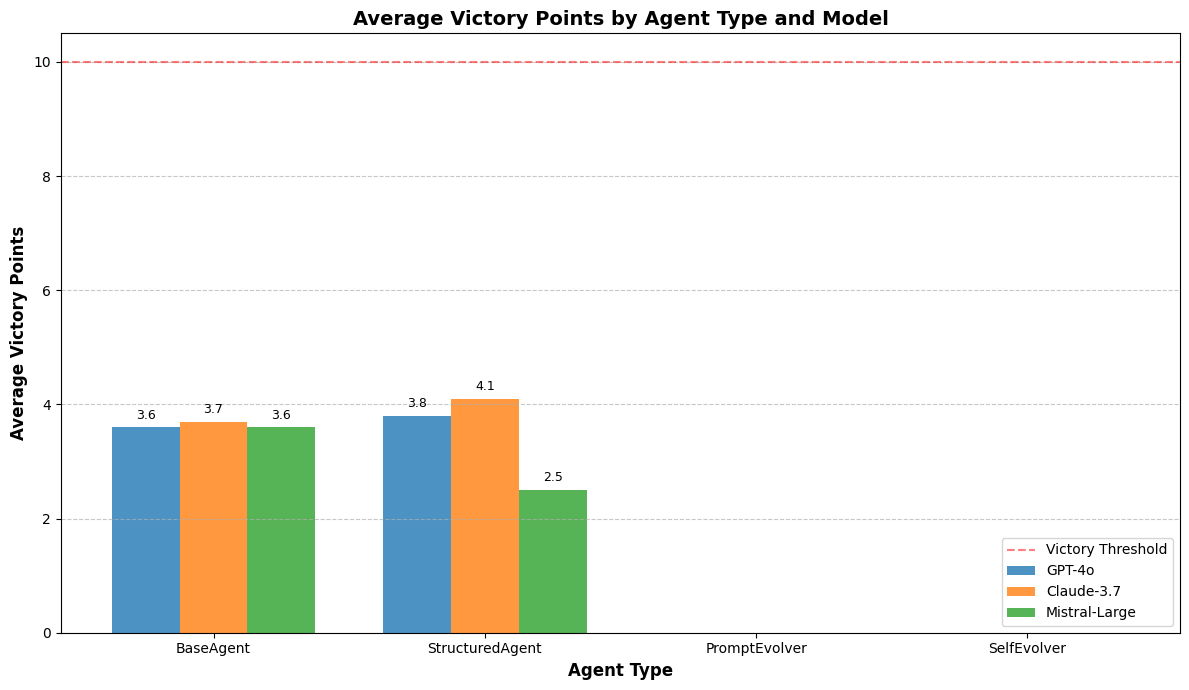

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_avg_vp_histogram(results_data):
    """
    Creates a histogram showing Average VP scores for each agent, grouped by model.
    
    Args:
        results_data: Dictionary containing the performance metrics data
    """
    # Extract agent and model names
    agents = list(results_data.keys())
    models = list(results_data[agents[0]].keys())
    
    # Set up the plot
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Width of each bar and spacing
    bar_width = 0.25
    
    # Define positions for groups of bars
    indices = np.arange(len(agents))
    
    # Define colors for models
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
    
    # Plot bars for each model
    for i, model in enumerate(models):
        avg_vp_values = []
        for agent in agents:
            # Skip if data is None/null
            if results_data[agent][model]["Avg VP"] is None:
                avg_vp_values.append(0)  # Use 0 for missing data
            else:
                avg_vp_values.append(results_data[agent][model]["Avg VP"])
        
        # Plot the bars for this model, positioned next to each other within each agent group
        ax.bar(indices + i*bar_width - bar_width, avg_vp_values, bar_width, 
               label=model, color=colors[i], alpha=0.8)
    
    # Add labels, title, and legend
    ax.set_xlabel('Agent Type', fontsize=12, fontweight='bold')
    ax.set_ylabel('Average Victory Points', fontsize=12, fontweight='bold')
    ax.set_title('Average Victory Points by Agent Type and Model', fontsize=14, fontweight='bold')
    
    # Set x-axis ticks in the middle of each group
    ax.set_xticks(indices)
    ax.set_xticklabels(agents, fontsize=10)
    
    # Add grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add a horizontal line at y=10 (victory condition)
    ax.axhline(y=10, color='red', linestyle='--', alpha=0.5, label='Victory Threshold')
    
    # Add legend
    ax.legend(fontsize=10)
    
    # Add data labels on top of each bar
    for i, model in enumerate(models):
        for j, agent in enumerate(agents):
            value = results_data[agent][model]["Avg VP"]
            if value is not None:
                ax.text(j + i*bar_width - bar_width, value + 0.1, f"{value}", 
                        ha='center', va='bottom', fontsize=9)
    
    # Adjust layout and display
    plt.tight_layout()
    
    # Save the figure
    plt.savefig('avg_vp_comparison.png', dpi=300, bbox_inches='tight')
    
    return fig

# Call the function
plot_fig = plot_avg_vp_histogram(results_data)
plt.show()

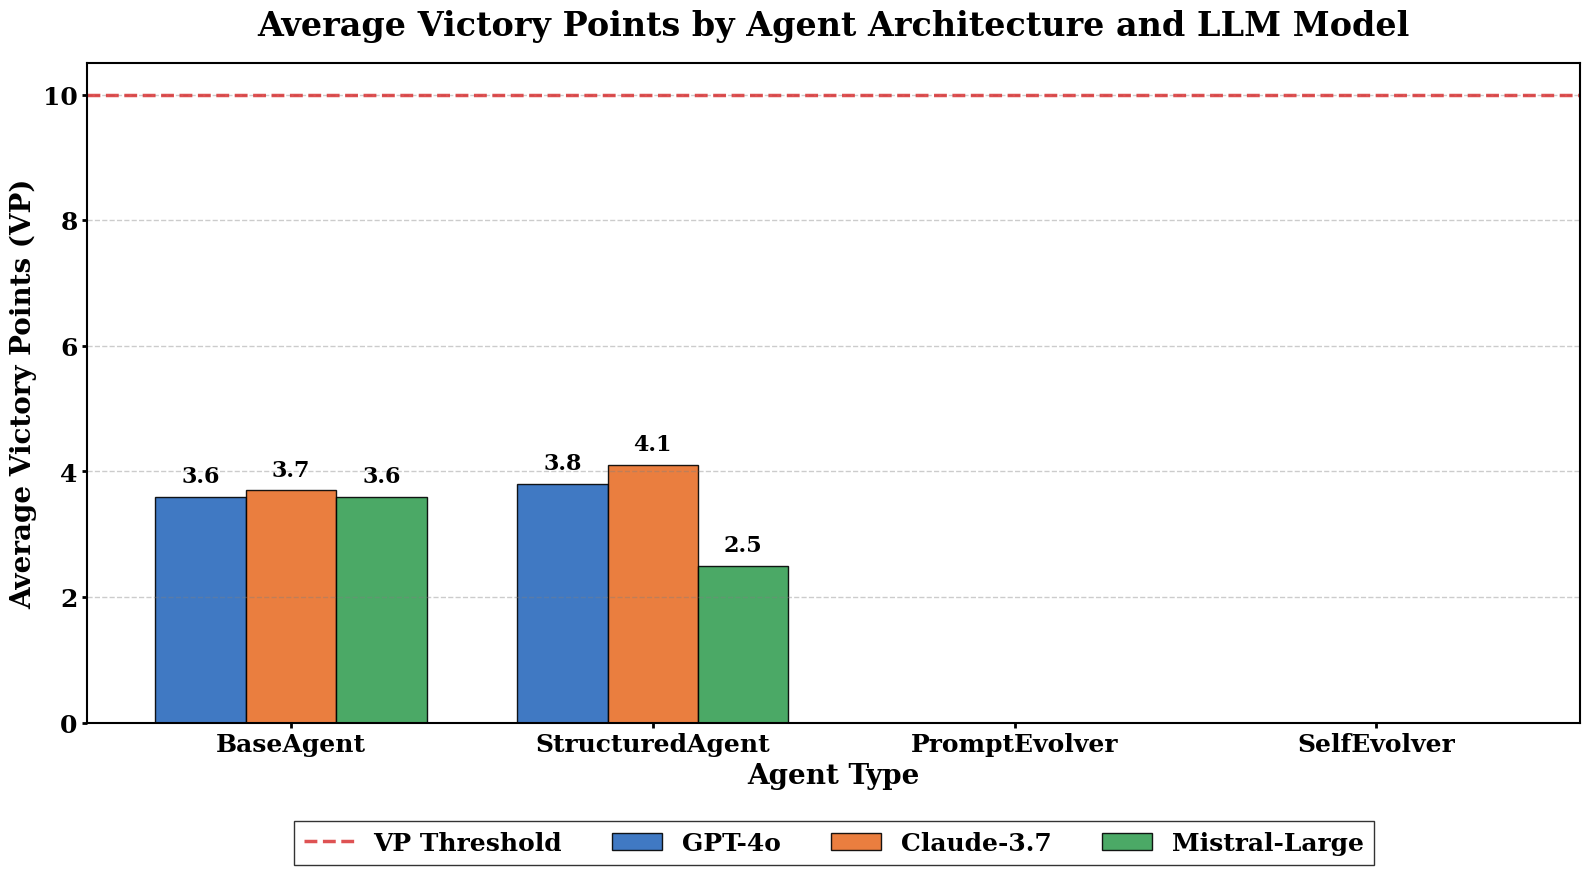

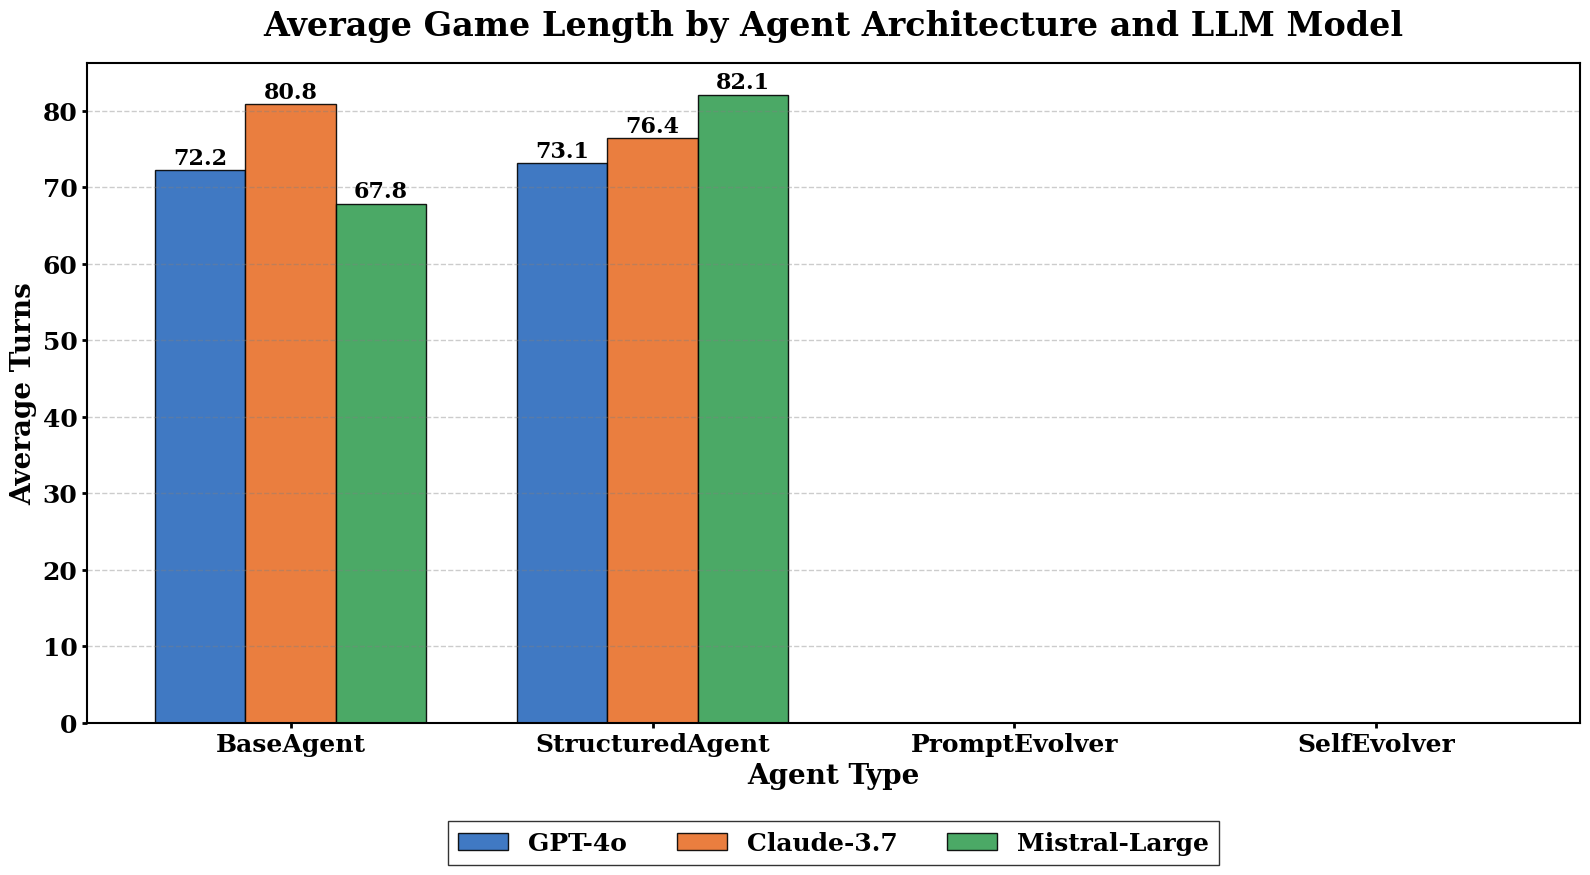

In [9]:
def plot_metric_histogram(results_data, metric="Avg VP", title=None, y_label=None, threshold=None):
    """
    Creates a histogram showing performance metrics for each agent, grouped by model.
    Styled for machine learning paper publication with very large, bold fonts and academic styling.
    
    Args:
        results_data: Dictionary containing the performance metrics data
        metric: The metric to plot (e.g., "Avg VP", "Avg Turns", etc.)
        title: Custom title for the plot (if None, will be generated based on metric)
        y_label: Custom y-axis label (if None, will use the metric name)
        threshold: Optional horizontal line to show a threshold value (e.g., 10 for victory)
    """
    # Set the font to serif for academic papers with increased weight
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman', 'DejaVu Serif', 'Palatino', 'serif'],
        'mathtext.fontset': 'stix',
        'font.weight': 'bold',
    })
    
    # Extract agent and model names
    agents = list(results_data.keys())
    models = list(results_data[agents[0]].keys())
    
    # Set up the plot - even larger figure for better resolution and text visibility
    fig, ax = plt.subplots(figsize=(16, 10))
    
    # Width of each bar and spacing
    bar_width = 0.25
    
    # Define positions for groups of bars
    indices = np.arange(len(agents))
    
    # Define colors for models - more vibrant, high-contrast colors for better visibility
    colors = ['#2B6BBD', '#E8702A', '#37A055']  # Enhanced blue, orange, green
    
    # Plot bars for each model
    for i, model in enumerate(models):
        metric_values = []
        for agent in agents:
            # Skip if data is None/null
            if results_data[agent][model][metric] is None:
                metric_values.append(0)  # Use 0 for missing data
            else:
                metric_values.append(results_data[agent][model][metric])
        
        # Plot the bars for this model with thicker borders
        ax.bar(indices + i*bar_width - bar_width, metric_values, bar_width, 
               label=model, color=colors[i], alpha=0.9, edgecolor='black', linewidth=1.0)
    
    # Add labels, title, and legend with larger font sizes and extra bold
    ax.set_xlabel('Agent Type', fontsize=20, fontweight='bold')
    
    # Use provided y-label or default to metric name
    if y_label is None:
        y_label = metric
    ax.set_ylabel(y_label, fontsize=20, fontweight='bold')
    
    # Use provided title or generate based on metric
    if title is None:
        title = f'{metric} by Agent Type and Model'
    ax.set_title(title, fontsize=24, fontweight='bold', pad=20)
    
    # Set x-axis ticks in the middle of each group with larger font
    ax.set_xticks(indices)
    ax.set_xticklabels(agents, fontsize=18, fontweight='bold')
    
    # Increase y-axis tick label size significantly
    ax.tick_params(axis='y', labelsize=18, width=2)
    ax.tick_params(axis='x', width=2)
    
    # Add grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.4, color='gray', linewidth=1.0)
    
    # Add a horizontal line for threshold value if provided - make it more visible
    if threshold is not None:
        ax.axhline(y=threshold, color='#D62728', linestyle='--', alpha=0.8, linewidth=2.5,
                   label=f'{metric.split()[-1]} Threshold' if 'Avg' in metric else 'Threshold')
    
    # Add legend with larger font and more prominence
    legend = ax.legend(fontsize=18, frameon=True, fancybox=False, edgecolor='black', 
              loc='upper center', bbox_to_anchor=(0.5, -0.13), ncol=4)
    
    # Make legend title and entries bold
    plt.setp(legend.get_title(), fontweight='bold')
    
    # Add data labels on top of each bar with larger font and more visibility
    for i, model in enumerate(models):
        for j, agent in enumerate(agents):
            value = results_data[agent][model][metric]
            if value is not None:
                # Position label above bar with more space
                y_pos = value + 0.15 if value >= 0 else value - 0.4
                ax.text(j + i*bar_width - bar_width, y_pos, f"{value}", 
                        ha='center', va='bottom', fontsize=16, fontweight='bold')
    
    # Set a tight layout but with more bottom padding for the legend
    plt.tight_layout(rect=[0, 0.08, 1, 0.98])
    
    # Add a thicker border around the plot for more definition
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
        spine.set_color('black')
    
    # Save the figure with high DPI for publication
    safe_metric = metric.replace(" ", "_").lower()
    plt.savefig(f'{safe_metric}_comparison.pdf', bbox_inches='tight', dpi=600)
    plt.savefig(f'{safe_metric}_comparison.png', bbox_inches='tight', dpi=300)
    
    return fig

# Examples of how to use the function:
# Plot average victory points with victory threshold line
vp_fig = plot_metric_histogram(
    results_data, 
    metric="Avg VP", 
    threshold=10,
    title="Average Victory Points by Agent Architecture and LLM Model",
    y_label="Average Victory Points (VP)"
)

turns_fig = plot_metric_histogram(
    results_data, 
    metric="Avg Turns", 
    title="Average Game Length by Agent Architecture and LLM Model",
    y_label="Average Turns"
)

plt.show()